In [2]:
import numpy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv(r'C:\Users\hp\Data Science\archive2\portfolio_data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(1520, 5)

In [6]:
df.head(100)

Date        AMZN        DPZ         BTC       NFLX
0    5/1/2013  248.229996  51.190983  106.250000  30.415714
1    5/2/2013  252.550003  51.987320   98.099998  30.641428
2    5/3/2013  258.049988  52.446388  112.900002  30.492857
3    5/6/2013  255.720001  53.205257  109.599998  30.098572
4    5/7/2013  257.730011  54.151505  113.199997  29.464285
..        ...         ...        ...         ...        ...
95  9/16/2013  296.059998  62.478928  139.149994  43.165714
96  9/17/2013  304.170013  63.044697  140.410004  42.792858
97  9/18/2013  312.029999  63.440723  135.050003  43.845715
98  9/19/2013  312.059998  63.761326  133.809998  43.642857
99  9/20/2013  316.339996  62.931549  134.380005  44.832859

[100 rows x 5 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [8]:
pd.isnull(df).sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [9]:
 pd.isnull(df)

Date   AMZN    DPZ    BTC   NFLX
0     False  False  False  False  False
1     False  False  False  False  False
2     False  False  False  False  False
3     False  False  False  False  False
4     False  False  False  False  False
...     ...    ...    ...    ...    ...
1515  False  False  False  False  False
1516  False  False  False  False  False
1517  False  False  False  False  False
1518  False  False  False  False  False
1519  False  False  False  False  False

[1520 rows x 5 columns]

In [10]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [11]:
df.describe()

AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001

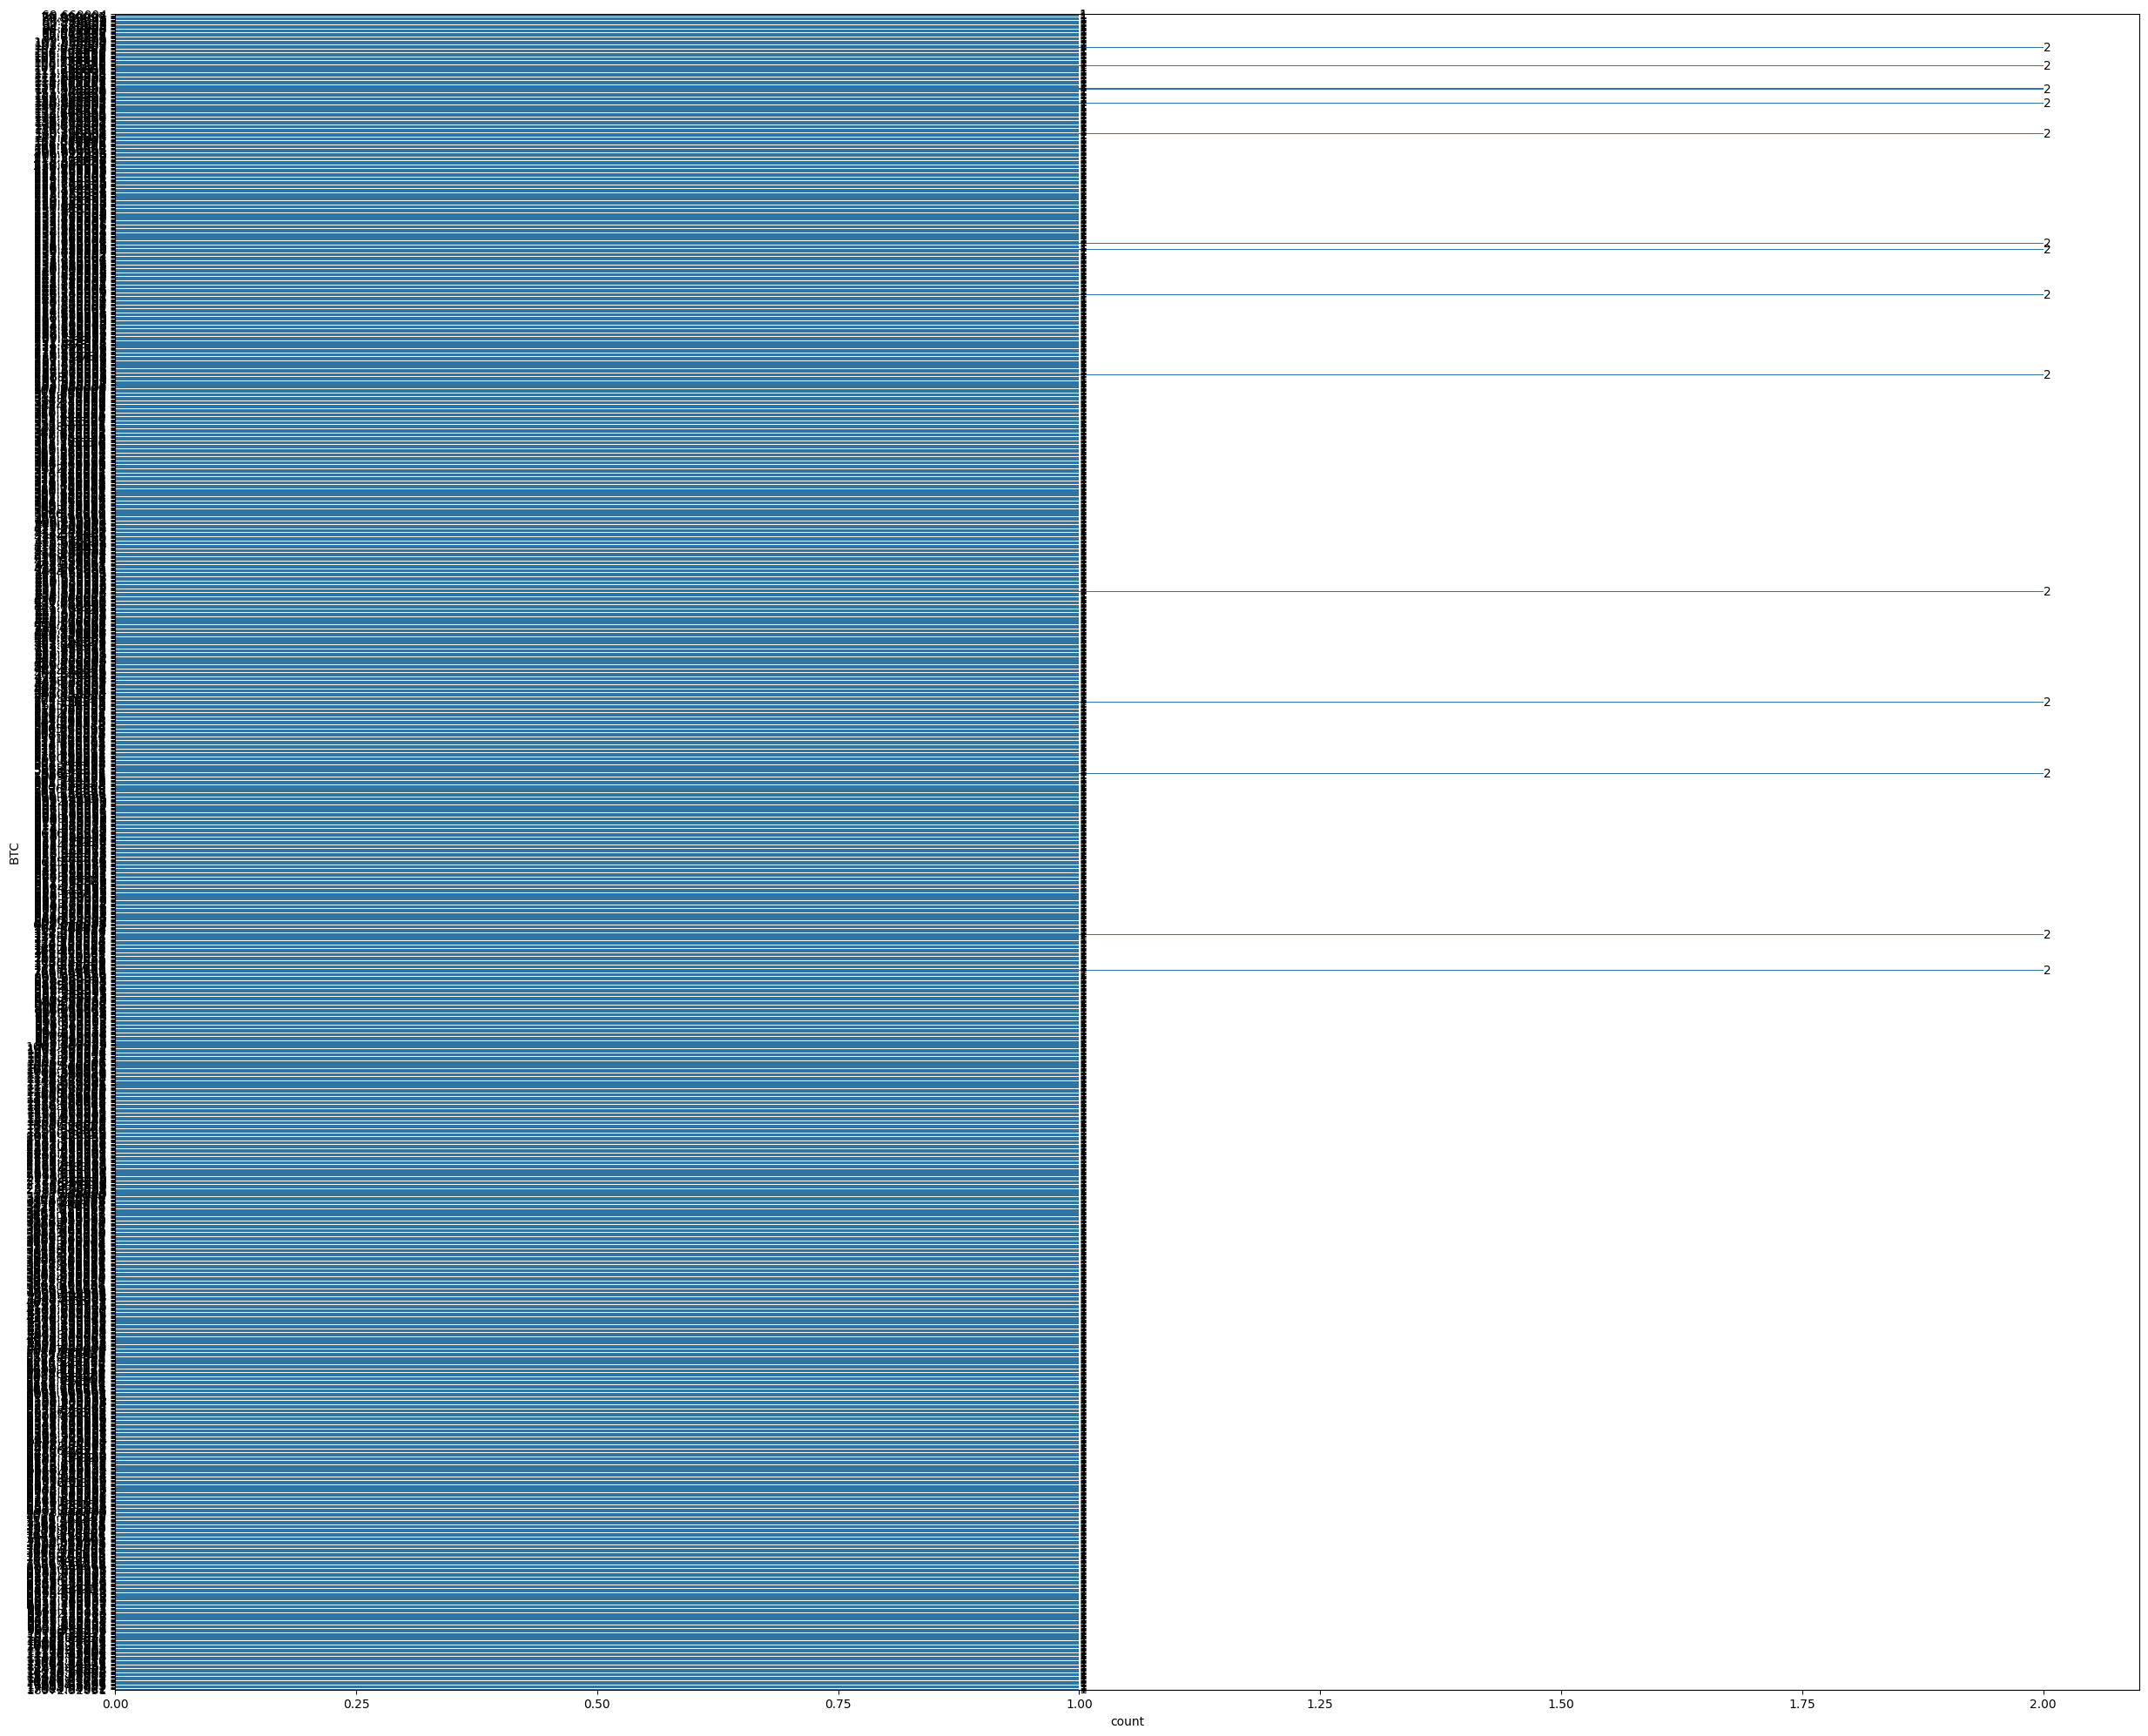

In [21]:
plt.figure(figsize=(30, 25))  # Adjust width and height as needed
ax = sns.countplot(y='BTC', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Date', ylabel='AMZN'>

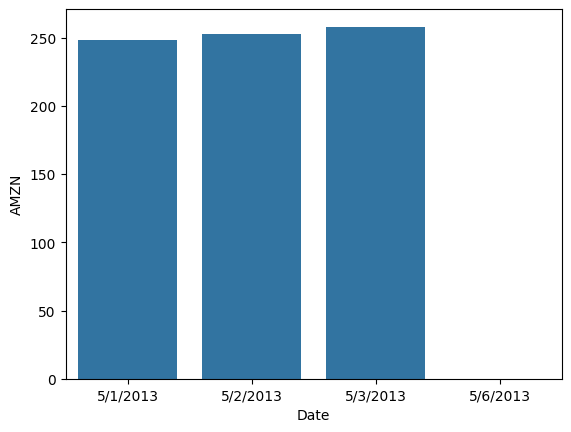

In [23]:
# Define the custom order of months
custom_order = ['5/1/2013', '5/2/2013', '5/3/2013', '5/6/2013']
# Convert the 'MONTH' column to categorical type with the custom order
df['D'] = pd.Categorical(df['Date'], categories=custom_order, ordered=True)

# Group by 'MONTH' and sum the 'QTY' values
sales_gen = df.groupby('Date', as_index=False, observed=False)['AMZN'].sum().sort_values(by='AMZN', ascending=False)

# Plot the bar chart
sns.barplot(x='Date', y='AMZN', data=sales_gen)

<Axes: xlabel='AMZN', ylabel='DPZ'>

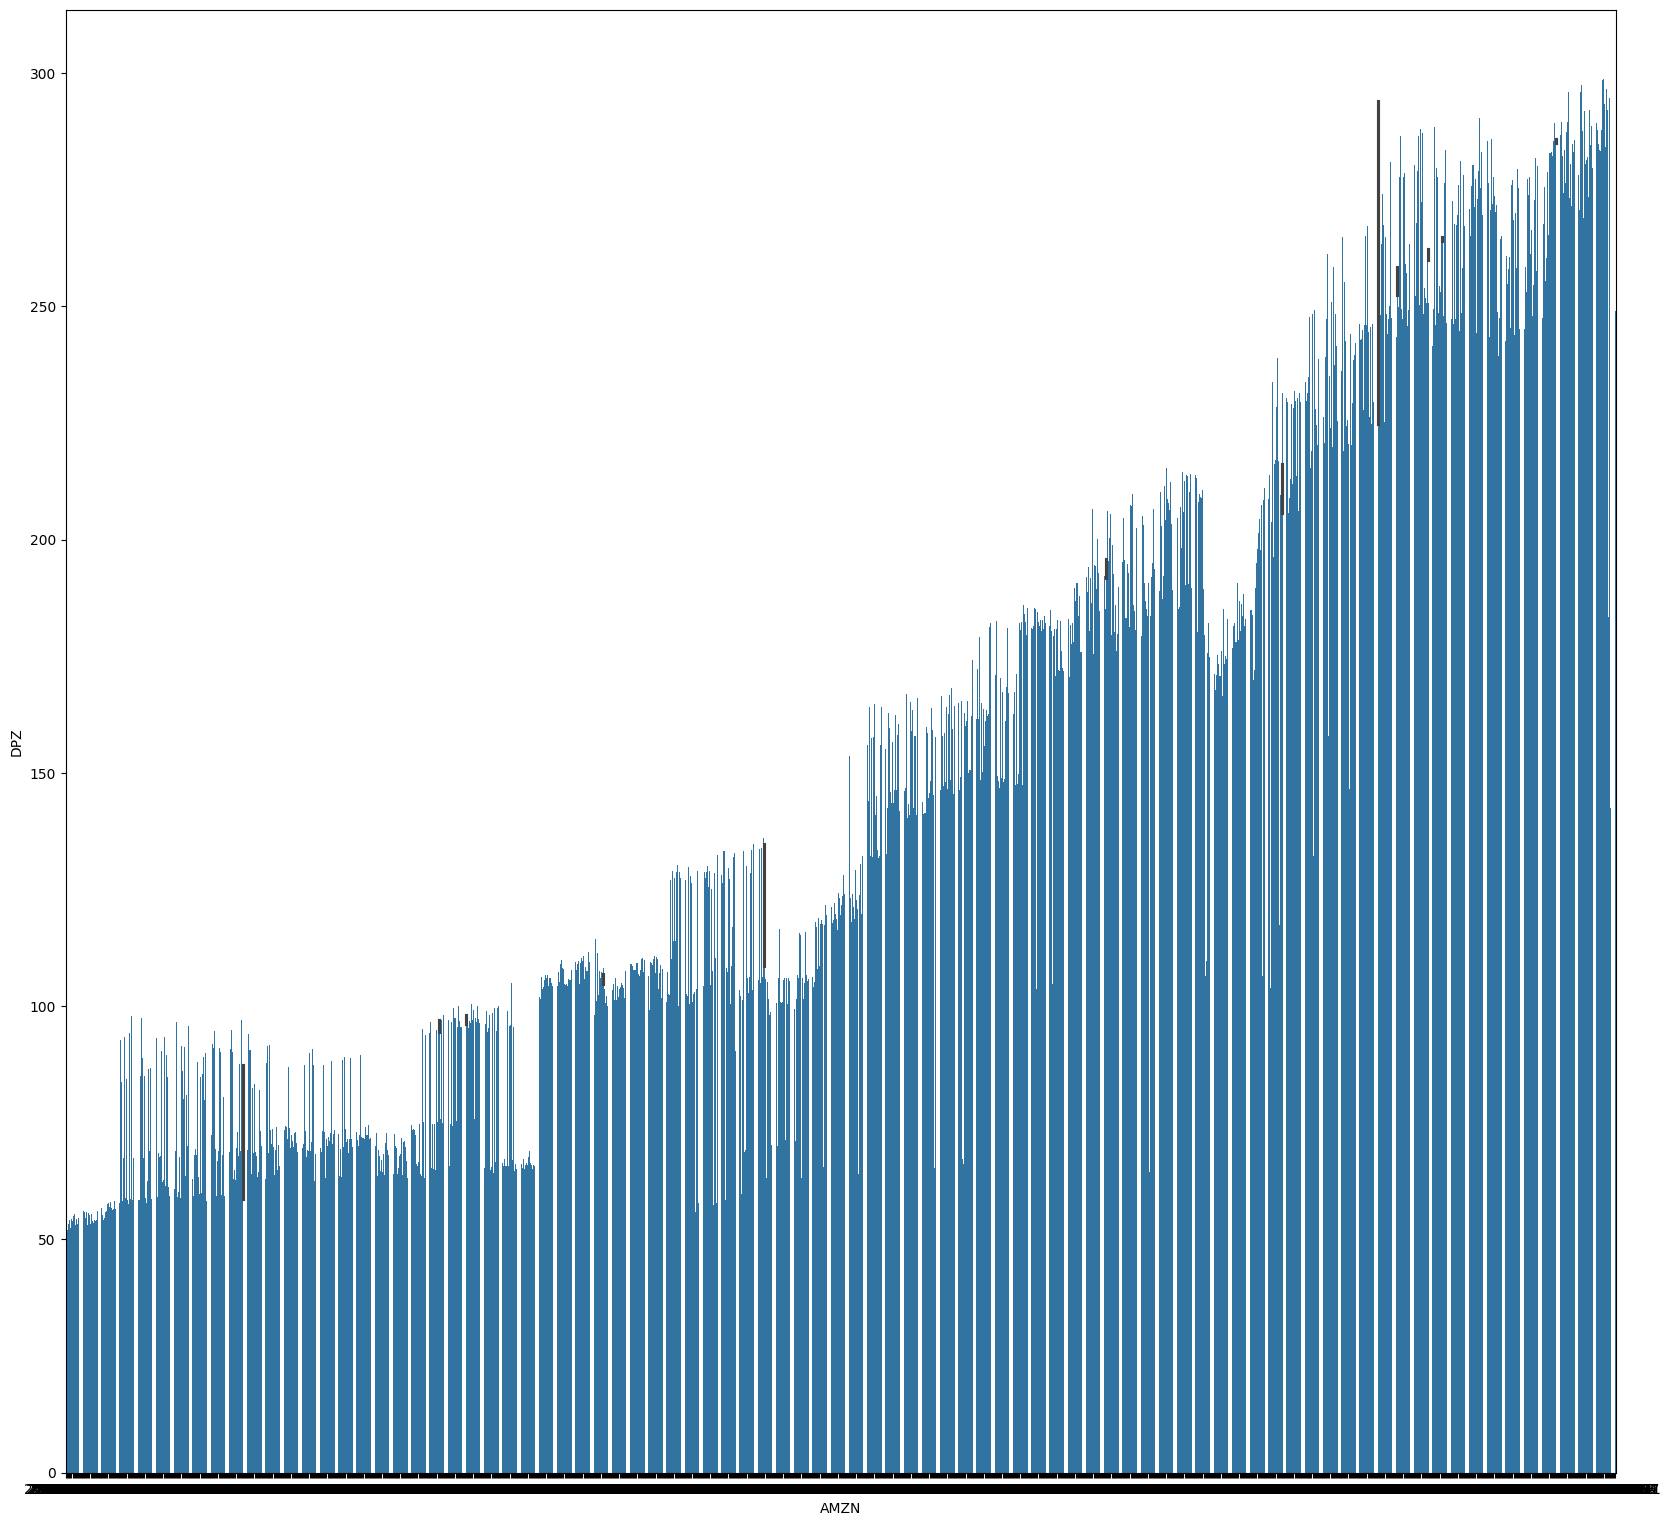

In [24]:
plt.figure(figsize=(20, 19))
a=df.groupby(['DPZ'],as_index=False)['AMZN'].sum().sort_values(by='AMZN',ascending=True)
sns.barplot(x='AMZN',y='DPZ',data=a)

(-1.1, 1.1, -1.1, 1.1)

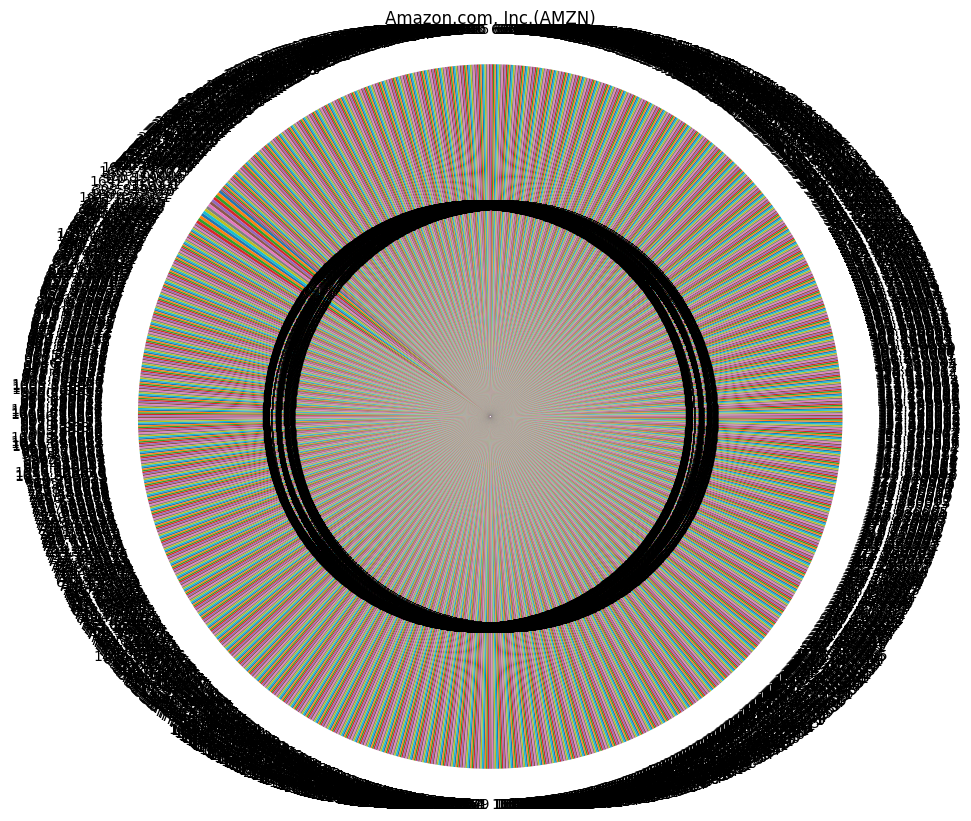

In [9]:
grp_counts = df['AMZN'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(grp_counts, labels=grp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Amazon.com, Inc.(AMZN)')
plt.axis('equal')

(-1.1, 1.1, -1.1, 1.1)

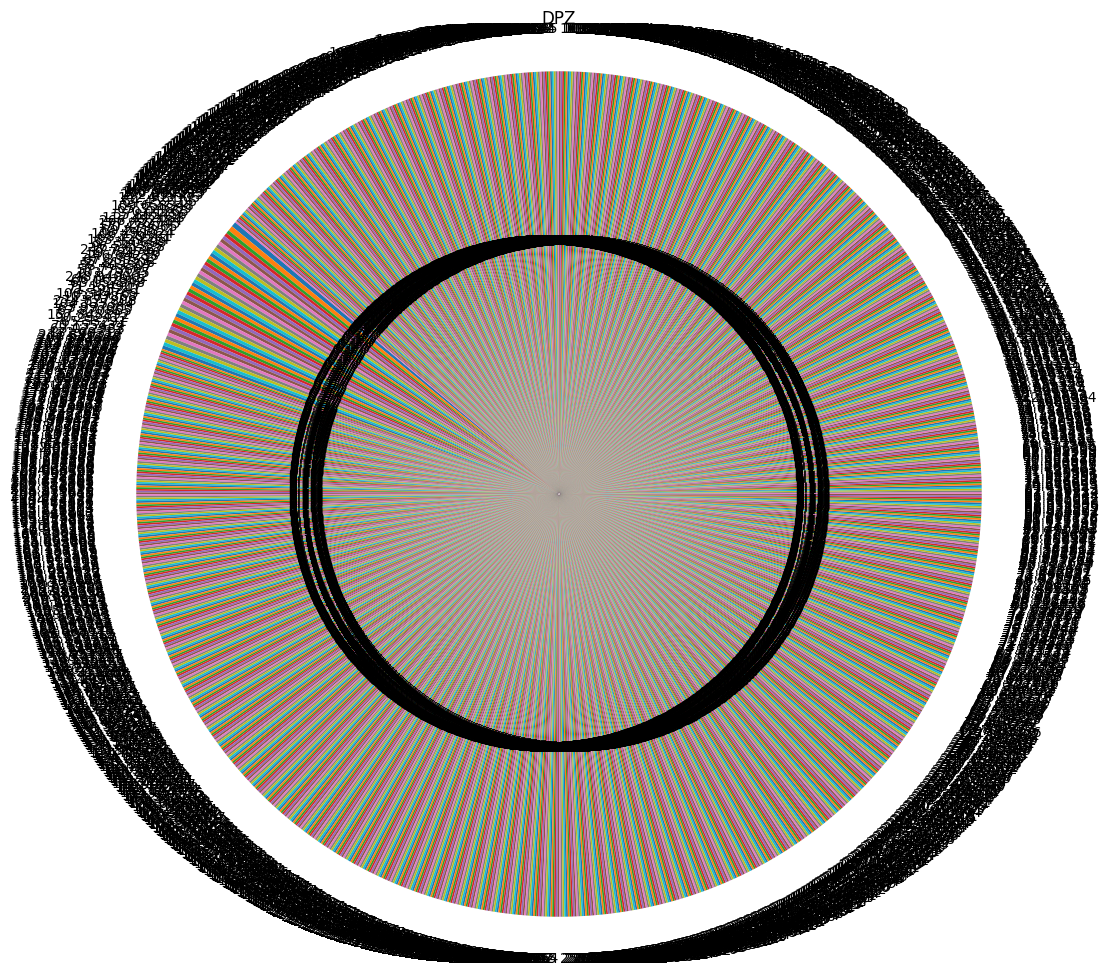

In [12]:
grp_counts = df['DPZ'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(12, 12))
plt.pie(grp_counts, labels=grp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('DPZ')
plt.axis('equal')

In [ ]:
# Extract these columns for analysis
columns_of_interest = ['AMZN', 'DPZ', 'BTC', 'NFLX']
data_subset = df[columns_of_interest]

# One-hot encode categorical variables
data_subset = pd.get_dummies(data_subset, columns=['AMZN', 'DPZ', 'BTC', 'NFLX'],)

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

In [ ]:
brand_counts = df['BTC'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brand_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

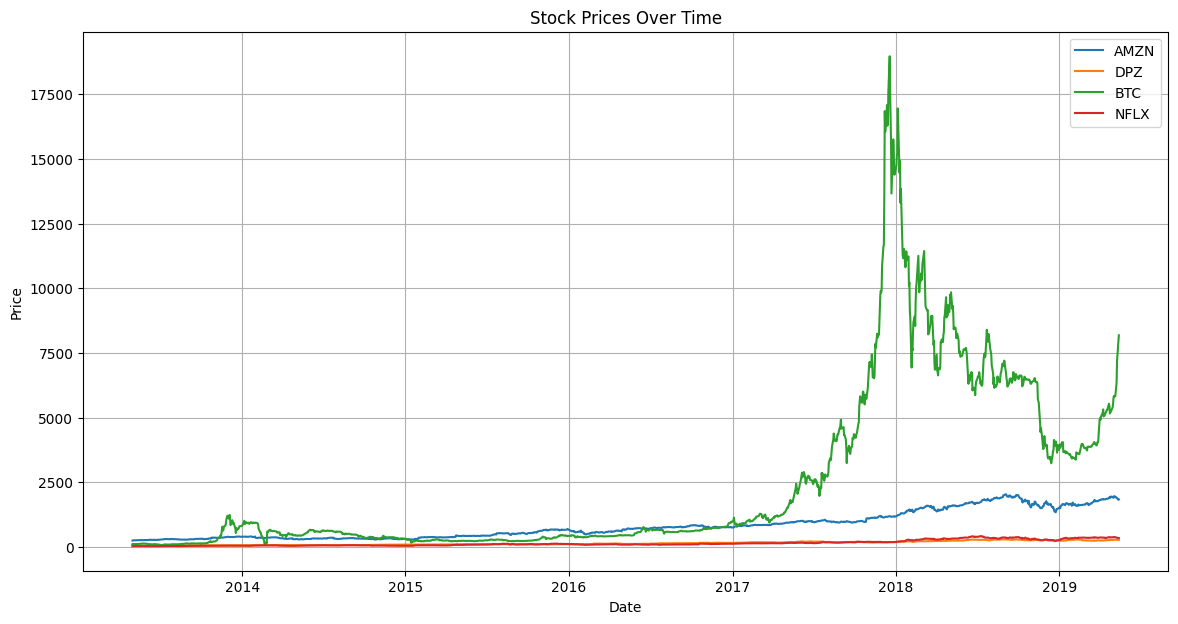

In [5]:
# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the stock prices over time
plt.figure(figsize=(14, 7), facecolor='white')
plt.plot(df.index, df['AMZN'], label='AMZN')
plt.plot(df.index, df['DPZ'], label='DPZ')
plt.plot(df.index, df['BTC'], label='BTC')
plt.plot(df.index, df['NFLX'], label='NFLX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()